# Prediction using Unsupervised ML
## K-means Clustering algorithm

## Author: Rahul Singh

## in this experiment we would cluster the alike data points together via the application of K-means clustering algorithm, this is a form of unsupervised algorithm that attempts to classify data without having first been trained with labeled data.  


### Importing libraries and data

In [14]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Load the iris dataset from the given data file
# link to the data file: : https://bit.ly/3kXTdox 
iris = pd.read_csv("Iris.csv") 
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### working with data
Now let us use the data to perform the K-Means algorithm operations, firstly we plot the graph of WCSS values for various number of clusters inorder to obtain a relationship between them<br>

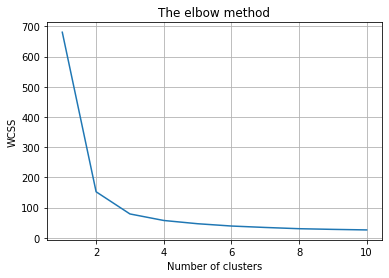

In [20]:
# Storing the data into an array for operations
x = iris.iloc[:, [1,2,3,4]].values

wcss = [] #within cluster sum of squares array

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(5)
plt.show()

### Elbow effect: from the plotted graph we observe the value of number of clusters where the value of WCSS starts to level-off (i.e., shows the elbow effect), this value is thus chosen as the number of clusters.

From the above graph we can see that the value of WCSS starts leveling-off when number of clusters is equal to 3. Thus, giving us the right choice for the number of clusters.

Now we plot the 3 clusters for our data along with the centroid point for each cluster

In [26]:
#confirmation Check
y = iris.iloc[:,5].values
y_dict = dict()
value = 0
for key in y:
    y_dict[key] = "present"
print(y_dict)    

{'Iris-setosa': 'present', 'Iris-versicolor': 'present', 'Iris-virginica': 'present'}


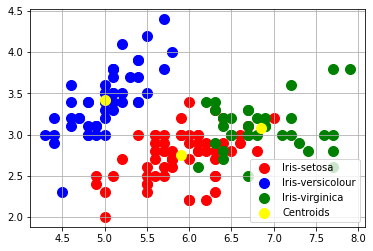

In [25]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid(5)
plt.legend()

{'Iris-setosa': 'present', 'Iris-versicolor': 'present', 'Iris-virginica': 'present'}
